In [ ]:
# Importacion de librerias necesarias para el proyecto
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Buena organización de importaciones en la celda [1]. Incluir pandas, matplotlib y seaborn desde el inicio facilita un flujo de EDA claro. Como micro-sugerencia, podrías fijar una semilla global (por ejemplo con numpy.random.seed) y definir un estilo de gráficos (sns.set(style='whitegrid')) para asegurar reproducibilidad visual y consistencia a lo largo del notebook.<br>
</div>

# Análisis exploratorio de datos (EDA)

In [2]:
datos_del_cliente= pd.read_csv('/datasets/gym_churn_us.csv')
datos_del_cliente

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Correcta lectura del dataset en la celda [2]. Ver el DataFrame completo confirma dimensiones y columnas. Para el trabajo diario, conviene utilizar métodos como .shape, .head() y .info() para inspecciones rápidas sin saturar la salida, y verificar tipos de datos y memoria. Esto hace el EDA más ágil y evita grandes volcados en pantalla.<br>
</div>

In [3]:
datos_del_cliente.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Muy bien aplicado .describe() en la celda [3]. Tus observaciones sobre edad media y ausencia de valores ausentes están en línea con los conteos. Como continuidad, vale la pena complementar con datos_del_cliente.isna().sum() y un boxplot de variables continuas para detectar valores atípicos; esto ayuda a decidir transformaciones o recortes suaves antes del modelado.<br>
</div>

**Podemos observar que no hay datos ausentes, el promedio de edad de los usuarios (29 años) y que hay mas variabilidad (desviación estándar) en la caractetistca de Avg_additional_charges_total, alejandose 96.35 del promedio**

In [4]:
datos_del_cliente.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Buen uso de groupby('Churn').mean() en la celda [4] para comparar perfiles de clientes que se van vs. se quedan. Esta vista resalta diferencias en contrato, visitas y frecuencia. Como mejora educativa, podrías calcular también la diferencia de medias (delta) y, para variables binarias, interpretarlas como proporciones. Incluso una estandarización de diferencias ayuda a juzgar magnitudes de efecto de forma más clara.<br>
</div>

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Tu interpretación tras la celda [4] es consistente: contratos más largos, visitas grupales y proximidad se asocian con menor churn. Una práctica útil es cuantificar la magnitud con razones o diferencias relativas y, si procede, contrastes simples (por ejemplo, test de proporciones para variables binarias) para reforzar la solidez del mensaje.
</div>

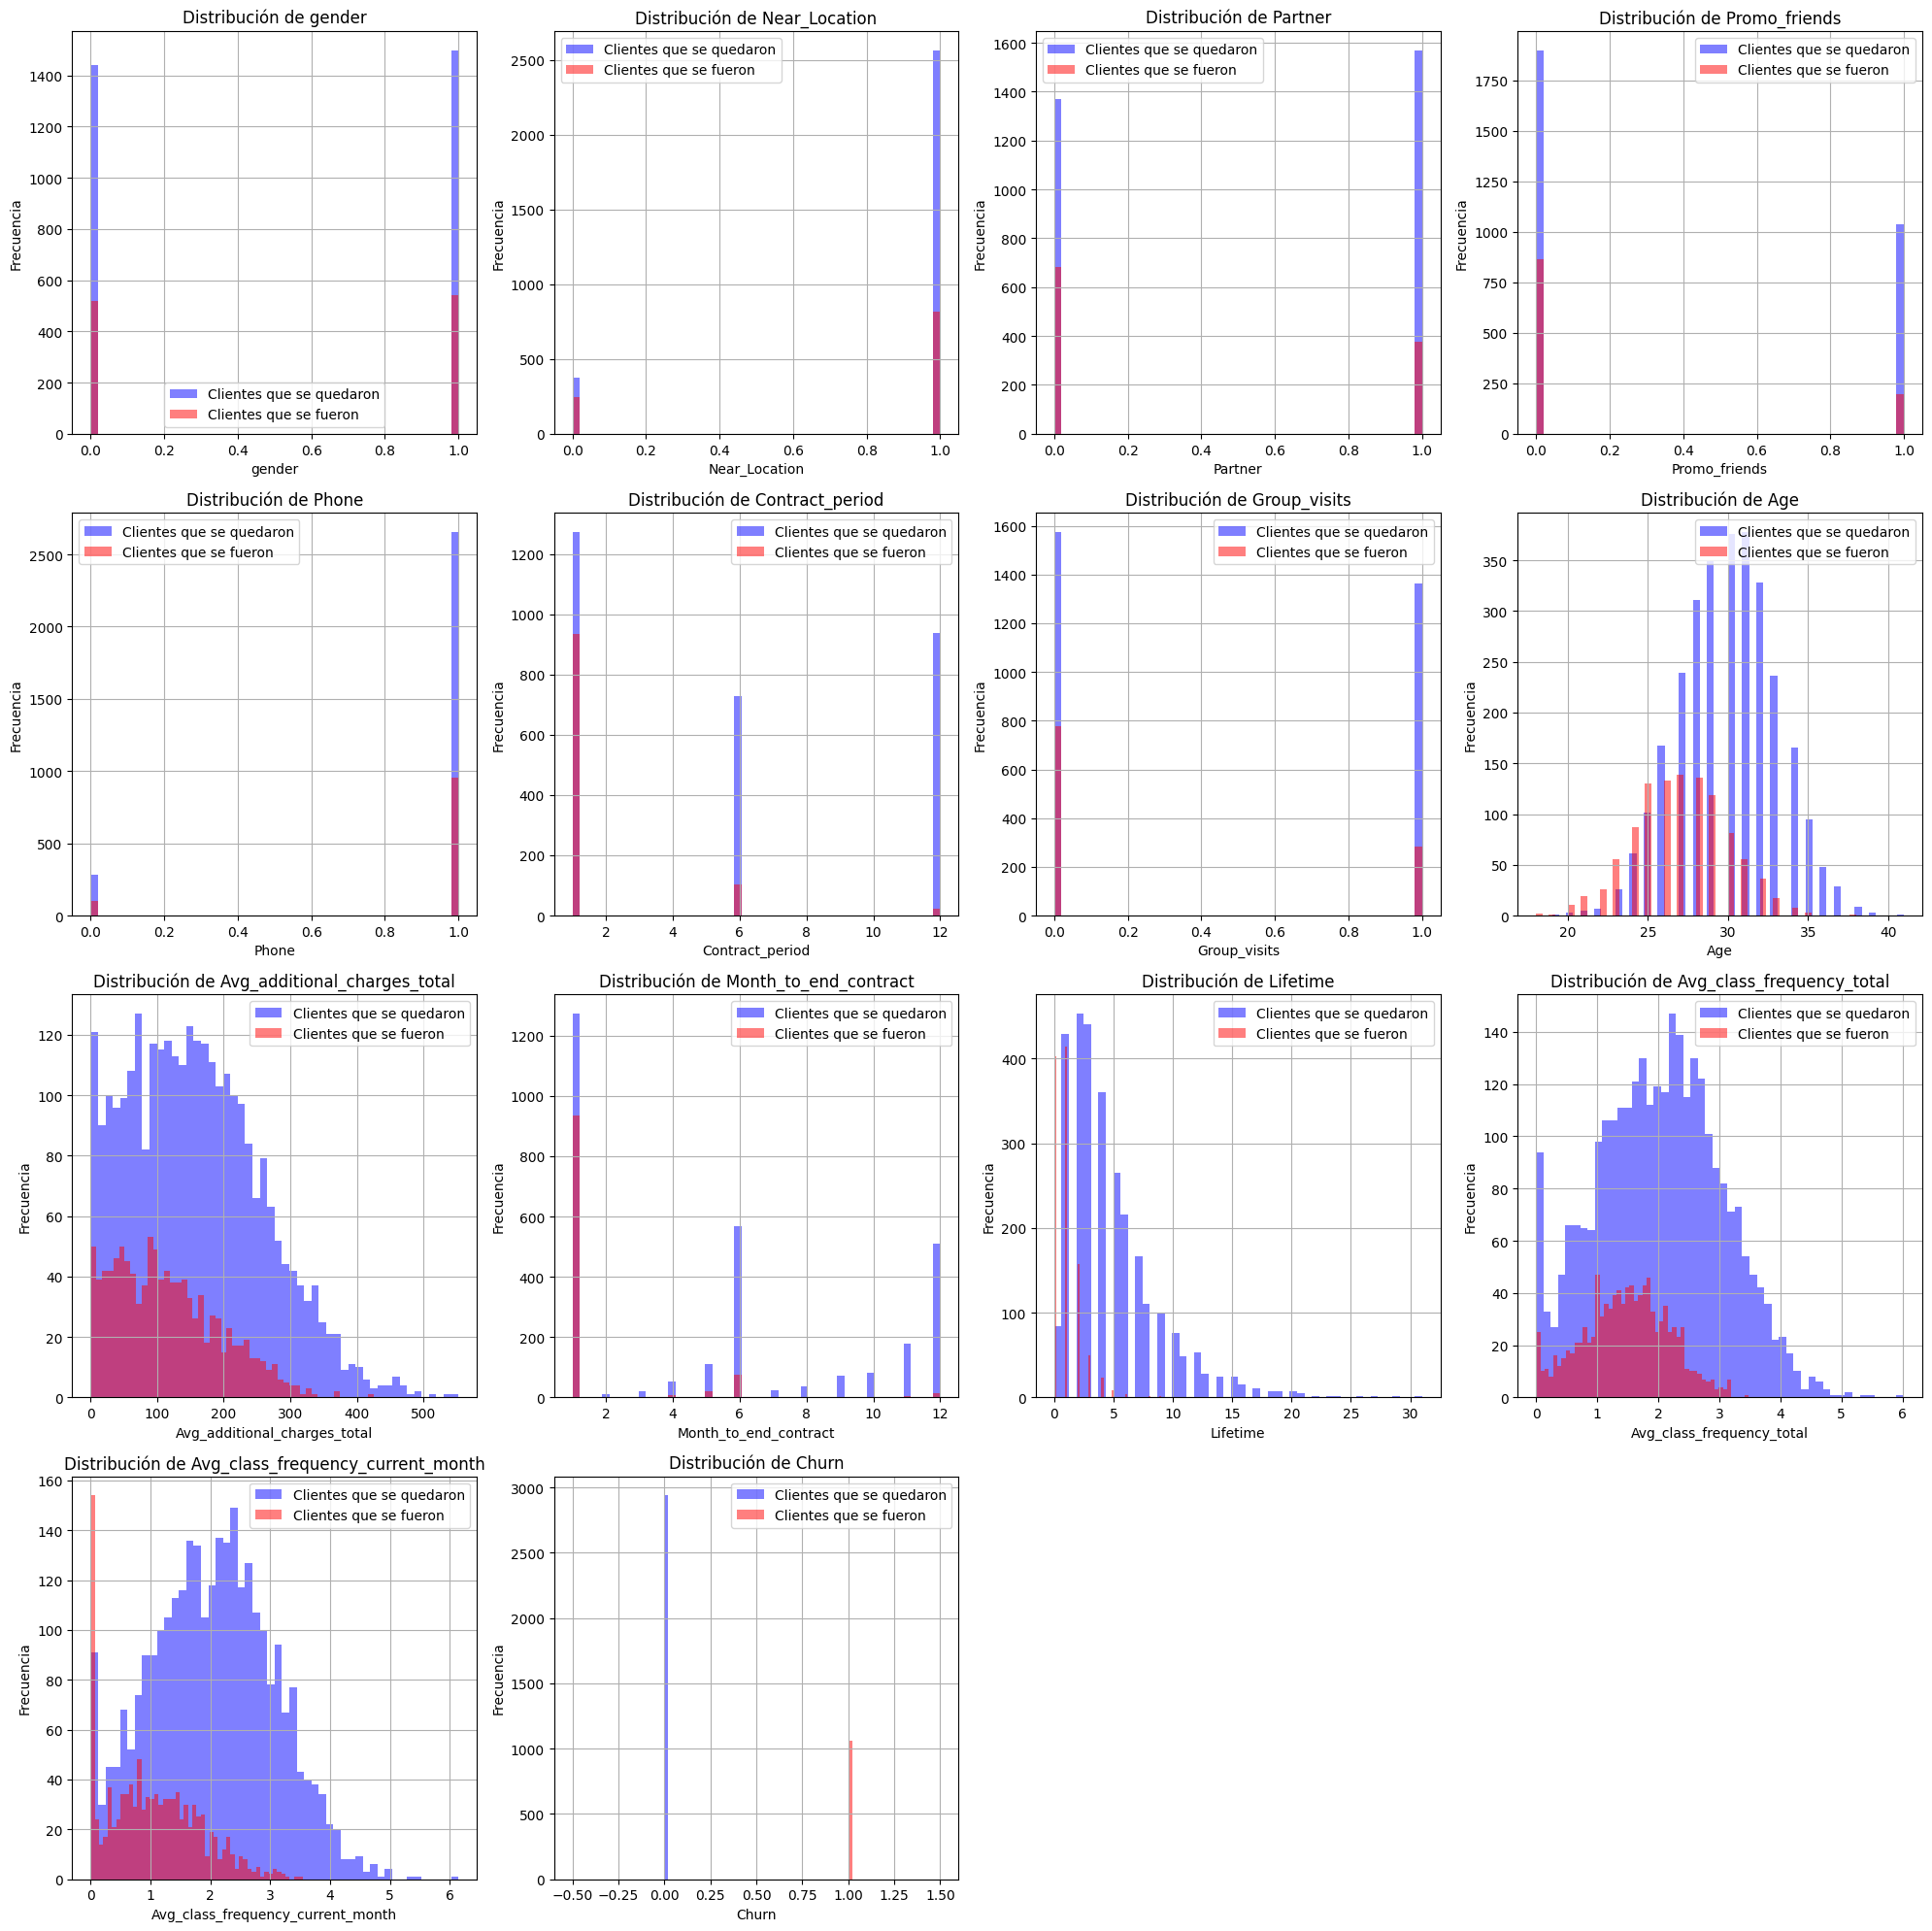

In [5]:
clientes_que_se_fueron = datos_del_cliente[datos_del_cliente['Churn'] == 1]
clientes_que_se_quedaron = datos_del_cliente[datos_del_cliente['Churn'] == 0]

num_columns = len(datos_del_cliente.columns) # Obtiene el número total de columnas en el DataFrame
# Calcula el número de filas necesario, asumiendo 4 gráficos por fila
num_rows = math.ceil(num_columns / 4)

# Crea una figura grande y un conjunto de subplots
# figsize se ajusta dinámicamente: 20 pulgadas de ancho y 5 pulgadas de alto por cada fila de gráficos
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
# Aplanamos el array de ejes para que sea más fácil iterar sobre ellos
axes = axes.flatten()

# Itera sobre cada columna y su índice
for i, column in enumerate(datos_del_cliente.columns):
    # Obtiene el eje actual para el subplot
    ax = axes[i]
    # Traza el histograma de clientes que se quedaron en el subplot actual
    clientes_que_se_quedaron[column].hist(bins=50, alpha=0.5, label='Clientes que se quedaron', color='blue', ax=ax)
    # Traza el histograma de clientes que se fueron en el mismo subplot
    clientes_que_se_fueron[column].hist(bins=50, alpha=0.5, label='Clientes que se fueron', color='red', ax=ax)
    # Establece el título, etiquetas de los ejes y leyenda para el subplot
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    ax.legend()

# Si hay subplots no utilizados (cuando el número de columnas no es un múltiplo de 4),
# los eliminamos para evitar gráficos vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajusta automáticamente los parámetros del subplot para que encajen en el área de la figura,
# evitando superposiciones
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Excelente idea la de superponer histogramas por estado de Churn en la celda [5]. Esto facilita comparar distribuciones. Para potenciar la lectura: para variables binarias usa conteos (barplot) en vez de 50 bins, y para continuas considera ajustar los bins de forma automática (p. ej., regla de Freedman–Diaconis) o usar densidades (kde) cuando tenga sentido. Así evitas ruido visual y resaltas patrones reales con mayor claridad.<br>
</div>

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Buena práctica limpiar ejes sobrantes y organizar subplots en la celda [5]. Si detectas colas largas (por ejemplo, en gastos adicionales), podrías usar una escala logarítmica en el eje x de esas variables. Esto comprime valores extremos y ayuda a distinguir mejor los rangos medios donde se concentra la mayoría de los clientes.<br>
</div>

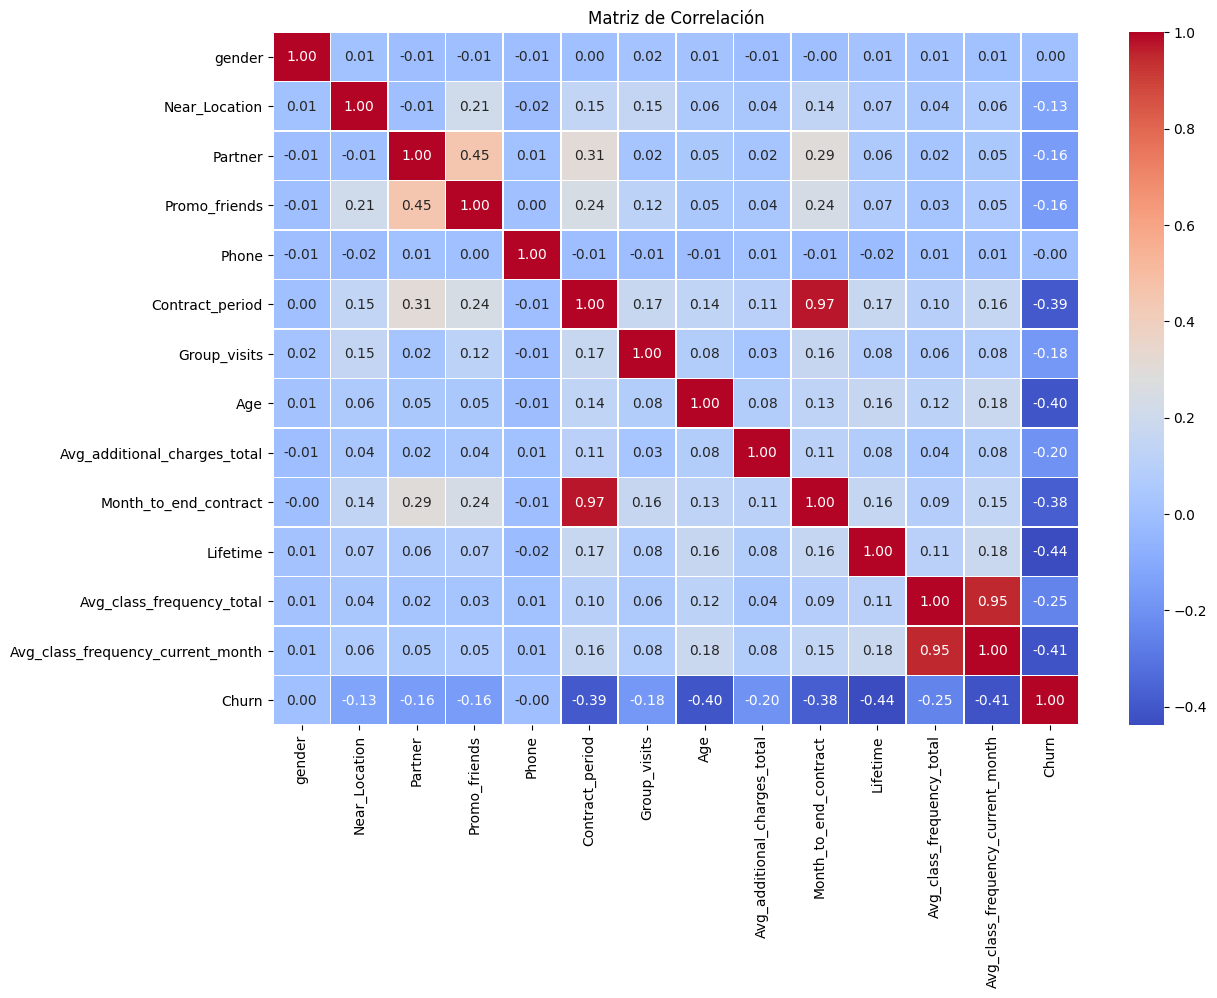

In [6]:
matriz_de_correlacion = datos_del_cliente.corr()

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(13, 9)) # Ajusta el tamaño de la figura para una mejor visualización
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación') 
plt.show()

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
La matriz de correlación de la celda [6] está muy bien presentada con etiquetas y anotaciones. Útil para prever multicolinealidad, sobre todo entre frecuencias total y del último mes. Antes de la regresión logística, conviene revisar pares con |r| alto y considerar eliminar o combinar variables muy redundantes, o evaluar VIF. Esto suele estabilizar coeficientes y mejorar interpretabilidad sin perder poder predictivo.<br>
</div>

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Excelente puente entre EDA y modelado con la matriz de correlación en [6]. Si decides mantener variables altamente correlacionadas, una alternativa es usar modelos menos sensibles a multicolinealidad (árboles/ensembles) para importancia de variables, y la logística para explicabilidad, contrastando resultados. Esta triangulación suele dar insights más confiables.
</div>

# Modelo para predecir la cancelación de usuarios

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score


#Divide los datos en características (la matriz X) y una variable objetivo (y)
X = datos_del_cliente.drop('Churn', axis=1)
y = datos_del_cliente['Churn']
#Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

modelos= {
    'regresión logística': LogisticRegression(random_state=0, max_iter=1000),
    'bosque aleatorio': RandomForestClassifier(random_state=0) 
}

# Entrenar cada modelo
for name, model in modelos.items():
    model.fit(X_train, y_train)

#Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación.
predicciones = {}
for name, model in modelos.items():
    predicciones[name] = model.predict(X_test)
    print(f"Modelo: {name}")
    print(f"Exactitud: {accuracy_score(y_test, predicciones[name])}")
    print(f"Precisión: {precision_score(y_test, predicciones[name])}")
    print(f"Recall: {recall_score(y_test, predicciones[name])}")
    print("\n")

Modelo: regresión logística
Exactitud: 0.92375
Precisión: 0.8586387434554974
Recall: 0.8282828282828283


Modelo: bosque aleatorio
Exactitud: 0.91625
Precisión: 0.8393782383419689
Recall: 0.8181818181818182




<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Muy buen enfoque comparando Regresión Logística y Bosque Aleatorio en la celda [8], y reportando accuracy, precision y recall. Como paso siguiente, añade ROC-AUC y, dado que Churn≈26.5%, también PR-AUC puede ser informativa. Estratificar el split (stratify=y) ayuda a preservar la proporción de clases en train/test y hace las métricas más estables entre corridas.<br>
</div>

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
La Regresión Logística suele beneficiarse de escalar características. Considera un Pipeline con StandardScaler+LogisticRegression para mejorar convergencia y calibración de probabilidades. Para el Bosque Aleatorio, podrías explorar hiperparámetros clave (n_estimators, max_depth, min_samples_split) con Grid/RandomizedSearchCV. Un pequeño barrido puede darte mejoras gratuitas sin complicar el flujo.<br>
</div>

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Excelente que reportes precisión y recall; te animo a mostrar también la matriz de confusión y, si el negocio lo requiere, ajustar el umbral de decisión para equilibrar falsos positivos/negativos. Usar curvas Precision-Recall o ROC para elegir un umbral orientado a costos suele traducirse en decisiones de retención más efectivas en la práctica.<br>
</div>

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Correcto el análisis comparativo final de métricas en [8]; la regresión logística rinde ligeramente mejor. Como micro-sugerencia final, reportar también desviaciones vía validación cruzada (cross_val_score) te permitirá comunicar no solo el nivel de desempeño sino su estabilidad, algo muy valorado al tomar decisiones de despliegue.
</div>

**Al comparar ambos modelos, la Regresión Logística mostró un rendimiento ligeramente superior en todas las métricas (Exactitud, Precisión y Recall). Esto sugiere que, para esta tarea específica de predicción de abandono, la Regresión Logística es un modelo un poco más efectivo.**

# Creacion de clústeres de usuarios/as

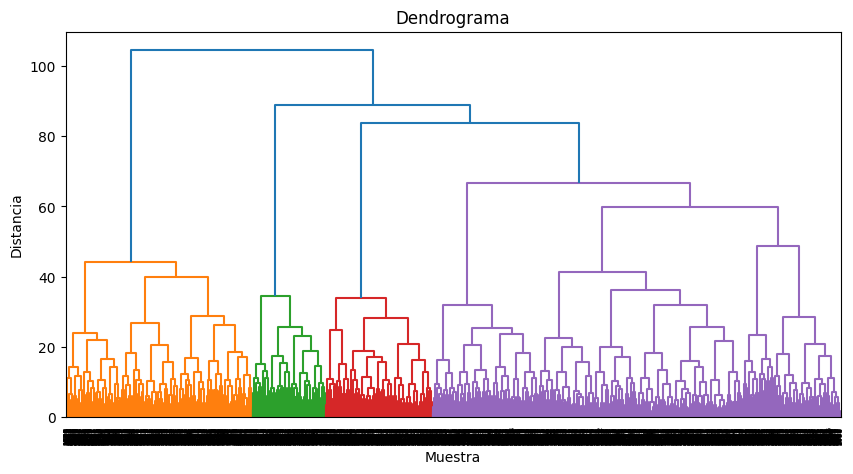

In [9]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

# Estandariza los datos.
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(datos_del_cliente.drop('Churn', axis=1))

# Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma.
linkage_matrix = linkage(datos_estandarizados, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix,orientation='top')
plt.title('Dendrograma')
plt.xlabel('Muestra')
plt.ylabel('Distancia')
plt.show()

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Muy bien estandarizar antes del clustering en la celda [9]; con Ward es fundamental. El dendrograma ofrece una vista jerárquica útil, aunque con 4000 observaciones puede volverse denso. Como micro-mejora, podrías trazar el dendrograma sobre una muestra representativa y complementar la elección de k con índices como silhouette o el método del codo para respaldar los 5 clústeres elegidos.<br>
</div>

In [10]:
# Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes.

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels=kmeans.fit(datos_estandarizados)
datos_del_cliente['Cluster'] = kmeans.labels_

# Para ver las características medias de cada clúster, agrupa por la columna 'Cluster'
# y calcula la media de las características originales.
datos_del_cliente.groupby('Cluster').mean()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Buen entreno de K-Means y asignación de etiquetas en la celda [10]. Un atajo práctico es usar kmeans.fit_predict(datos_estandarizados) para obtener directamente las etiquetas. Tu perfilado por medias es acertado; como paso adicional, invertir el escalado de los centroides (scaler.inverse_transform(kmeans.cluster_centers_)) ayuda a interpretar en unidades originales qué define a cada clúster.<br>
</div>

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Muy bien que fijes random_state en K-Means. Para resultados aún más robustos, especifica n_init (en versiones nuevas, n_init='auto') y revisa el tamaño de cada clúster para evitar segmentos demasiado pequeños. Darles un nombre descriptivo según su perfil (p. ej., "Fieles de contrato largo") facilita comunicar hallazgos a negocio.<br>
</div>

**Acorde con los valores medios de las caracteristicas para cada cluster podemos notar que los clusters 1,2 y 3 que tienen los clientes mas jovenes son los que menos han gastado en servicios del gimnasio, por otra parte los clusters 0 y 4 que tiene los clientes de alrededor de 30 años son los que mas han gastado.**

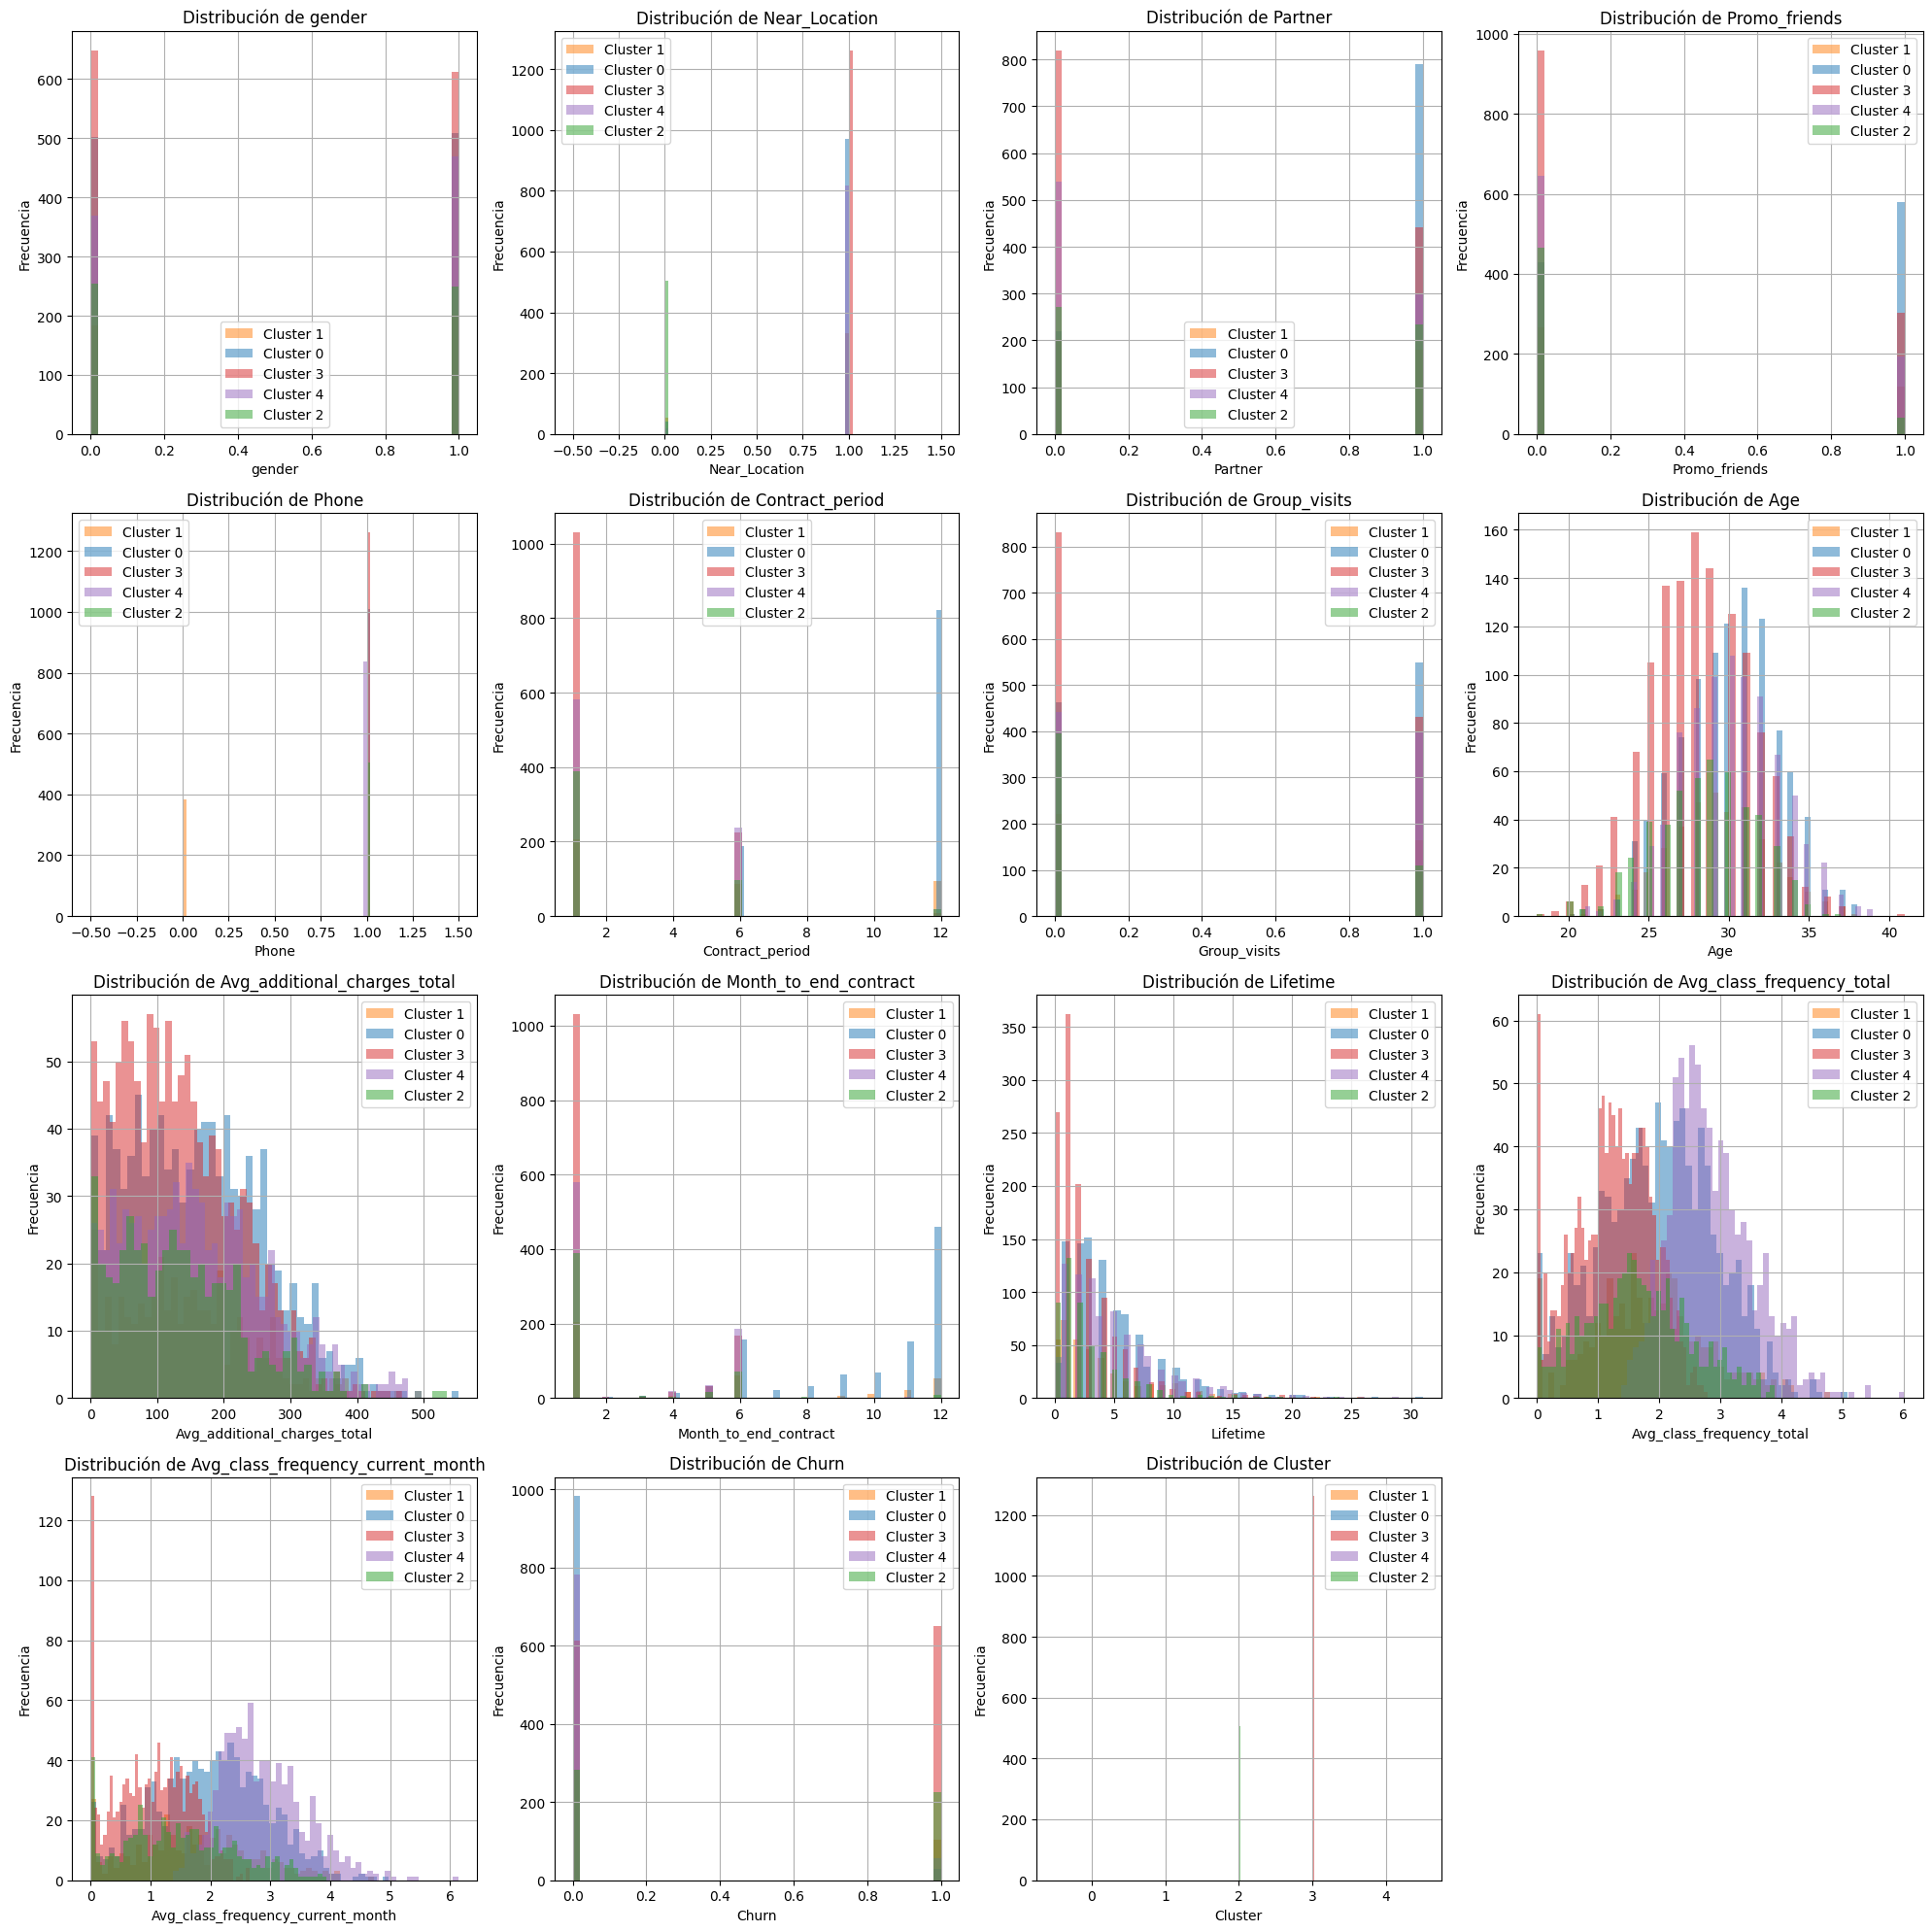

In [11]:
# Traza distribuciones de características para los clústeres.
clusteres=datos_del_cliente['Cluster'].unique()
num_columns = len(datos_del_cliente.columns)
num_rows = math.ceil(num_columns / 4)
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Itera sobre cada columna y su índice
for i, column in enumerate(datos_del_cliente.columns):
    # Obtiene el eje actual para el subplot
    ax = axes[i]
    
    for cluster in clusteres:
        cluster_data = datos_del_cliente[datos_del_cliente['Cluster'] == cluster]
        cluster_data[column].hist(bins=50, alpha=0.5, label=f'Cluster {cluster}', color=f'C{cluster}', ax=ax)


    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    ax.legend()
# Si hay subplots no utilizados (cuando el número de columnas no es un múltiplo de 4),
# los eliminamos para evitar gráficos vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Buena visualización de distribuciones por clúster en la celda [11]. Para mejorar la lectura, excluye columnas como 'Churn' y 'Cluster' del bucle de histogramas y emplea seaborn con hue=Cluster en variables clave o FacetGrid para evitar leyendas extensas. Esto centra la atención en las variables con mayor poder de segmentación y reduce el ruido visual.<br>
</div>

**Podemos notar que los clientes con contratos largos, con mayor visitas al gimnasio, los que tienen un promedio de edad de 30 años y los clientes que se inscriben mediante una compania asociada o una oferta son menos probable que se vayan, y mas si viven cerca. Los clientes con contratos cortos y con un promedio de edad de 28 años son los mas probables que se vayan.**

In [12]:
tasa_de_cancelacion = datos_del_cliente.groupby('Cluster')['Churn'].mean()
print(tasa_de_cancelacion*100)

Cluster
0     2.772277
1    26.753247
2    44.356436
3    51.426307
4     6.801909
Name: Churn, dtype: float64


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Claro y directo el cálculo de tasas de cancelación por clúster en la celda [12]. Como complemento, ordena de mayor a menor y grafícalas con barras y etiquetas de porcentaje. Si quieres añadir rigor, puedes estimar intervalos de confianza (p. ej., Wilson) para comunicar la incertidumbre de cada tasa de manera sencilla y transparente.<br>
</div>

**Podemos observar que en los clusters 0 y 4 son mas clientes fieles al gimnasio, mientras que en los clusters 1,2 y 3 hay mas clientes que tienden a irse.**

# Conclusiones y recomendaciones básicas sobre el trabajo con clientes

*   **Personalización de la Oferta: Enfocarse a los clientes que tengan alrededor de 30 años , que tiene una alta frecuencia de clases, ofrecer paquetes de clases avanzadas o talleres especializados. Para los clientes mas jovenes, reforzar los lazos comunitarios a través de eventos especiales o grupos de interés.**
  
*   **Incentivos para Contratos Largos: Ofrecer descuentos o beneficios adicionales por la renovación a contratos de 6 o 12 meses.**

  
*   **Promociones de Amigos: Incentivar el uso del programa "Promo_friends" para el Clúster 3, ya que actualmente su participación es baja y podría generar mayor compromiso social.**

*   **Comunicación Dirigida: Utilizar la segmentación para enviar mensajes y ofertas personalizadas, evitando el envío masivo e irrelevante.**